# Milestone 3: Results
### On Tonal ambiguity and harmonic structure in Debussy’s piano music
#### By Ludovica Schaerf, Sabrina Laneve , Yuanhui Lin, Raphael Levier.

The notebook is articulated as follows:
1. [Precision of Research Question](#Research-Question)
2. [Refinement of Methods](#Methods)
3. [Presentation of final results](#Final-Results)
4. [Outlook on final interpretation](#Interpretation)

## Research Question

Our research project aims at investigating the harmonic construction of Debussy’s piano works, identifying features signalling the composer’s departure from common-practice tonality and characterizing his Impressionist style. By exhibiting structural differences between his earlier pieces and his later pieces, we intend to trace the composer’s gradual shift from tonal clarity towards tonal ambiguity. 

An important feature of classical harmony is that tonality can be established only through the "asymmetrical" divisions of the tonal system: because symmetrical scales have a repeating step pattern, the scale degrees are not unique and there is no way to determine a root. Thus, we could say that tonality goes hand in hand with "asymmetry", while atonality with "symmetry" [1].

Thus, we made the assumption that tonal ambiguity in Debussy’s work would arise mainly from more use of whole tone scales, chromatic scales, octatonic scales, symmetrical chords and interval cycles based on the equalization of the chromatic tones. 
We also took into consideration the use of the pentatonic scale: even if the pentatonic scale is part of the asymmetrical scales, it has some symmetrical properties [2] and its anhemitonic characteristic makes it different from other diatonic scales (especially major/minor scales). Moreover, we believe that this scale is a predominant element of Debussy’s musical idiom [3] and therefore it must be taken into account. 

With regards to the harmonic form of the pieces, we expect to find a gradual decrease of an overall diatonic structure determining the harmonic hierarchy, in favour of a more fragmented form or in favour of the rise of a symmetrical scale/field (e.g. whole-tone, octatonic) determining the overall structure. In addition, we also thought that the use of hybrid harmonic/melodic structures and polytonality is an important factor contributing to the disappearance of a clear tonal context in his music.


## Methods

This section is organized as follows:
We first introduce the original method we use: wavescapes in [Original Method: Wavescapes](#Original-Method:-Wavescapes). We then shortly introduce how we use this method manually in [Analysis of the plots: Prélude X](#Analysis-of-the-plots:-Prélude-X). Finally, we discuss some automatic methods that expand the original method and allow distant reading of the pieces in [Adjustments and extensions to the method](#Adjustments-and-extensions-to-the-method).

### Original Method: Wavescapes

For our analysis we used wavescapes, a method developed by Cédric Viaccoz to visualize and analyze tonal hierarchies in musical pieces based on the Discrete Fourier Transform (DFT). Wavescapes are built following the approach of keyscape plots to hierarchically organize pitch content. Differently from keyscapes, the detection can be applied to study hierarchical relations in music not only within but also beyond common-practice tonality, thanks to the use of the DFT.

DFT performs the extraction of regular collections of pitch classes. It does so by decomposing a Pitch Class Vector (PCV) into a sum of sinusoidal functions of unique frequency with varying amplitudes and phases. The Pitch Class Vector is the sum of the durations of all pitch classes into a musical sequence. From the DFT, six unique Fourier coefficients are obtained. The coefficients are then visualized in six plots displaying the phase and normalized magnitude in the hue and opacity respectively. The magnitude is interpreted as the amount of resonance between the input and a selected Fourier coefficient. The phase indicates the transposition of the active structure. 

The hierarchical plot is formed as follows:
- If we consider a piece that can be divided in N sections of equal durations (a segment being a measure or a chosen minimal duration), these sections can be associated with N Pitch Class Vectors. These N segments form the bottom row of what will become the wavescapes, as we can see in Figure 1. 
- To construct the rest of the triangle each segment (m,n) is associated with the sum of the Pitch Class Vectors m to n, which are on the bottom row. If we consider the row n°1 to be the bottom row, row n°1 will be composed of N segments, row n°2 of N-1 segments, row n°3 of N-2 segments and so on until we reach the top of the triangle which consists of one segment. 
- We can then perform the DFT on each one of these segments (N(N+1)/2 of them in total), and then map the 6 Fourier coefficients of each segment to a colour. 
- The result consists of the 6 triangular shaped wavescapes plots, that display the magnitude and the phase of each segment in  a hierarchical manner.

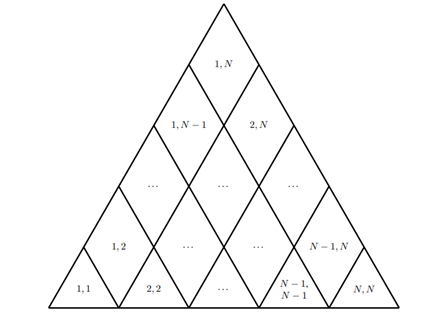     

                                       Figure 1, Visualization of the hierarchy of segments


In the wavecapes, the PCVs that resonate the most are the ones containing high values on the pitch class indexes where peaks of the discrete cosine occur. Therefore, the normalized magnitude of the k-th coefficient is maximal for PCVs that represent an equal division of the octave. The 5th coefficient is an exception to this. While all coefficients have an even chord that corresponds the best with the peaks of their discrete cosine, the 5th resonates most with asymmetrical structures. 

We found this characteristic of the model particularly suitable to our research, as it can be used to investigate the relationship between symmetrical and asymmetrical structures, the latter being best represented by the 5th coefficient.

### Analysis of the plots: Prélude X, Book I

As a first step in our methodology, we carried out a close reading analysis of some musical passages and pieces. We compared our literature studies and manual analysis to what we found in the wavescape plots, in order to test the method insights or limitations with respect to our musical intuition.

In particular, we analyzed in detail  «La cathédrale engloutie» (Preludes, Book 1, No 10), identifying correspondences between the most evident patterns in the plots and the pitch content found in the score. As this analysis was based on the visualization of the plots, we found it useful to compute a visualization of the triangles including only the magnitude and not the phase, in order to better identify the most resonant coefficients without being distracted by the color.

![b&w](figures/b&wPreludeXcoefficient5-Copia.png "Figure 2, magnitude plot of  «La cathédrale engloutie» , 5th coefficient")    

                            Figure 2, magnitude plot of  «La cathédrale engloutie» , 5th coefficient
                          
[magnitude plot of  «La cathédrale engloutie» , 5th coefficient](https://github.com/ludovicaschaerf/Group-5-Debussy-Pitch-Scapes/blob/main/figures/b%26wPrelude%20X%20coefficient%205.png)

This piece was chosen because it is commonly considered as one of the most representative of the Impressionist style, and because it contains a coexistence of different musical structures, including the alternation or superimposition of diatonic and pentatonic scales.


### Adjustments and extensions to the method

The close reading analysis of the wavescapes brought to our attention that some of the features of our interest for the analysis were not visible to the bare eye. Thus, we implemented automatic methods to gather statistics about the wavescapes and the DFTs in general. This allowed us to search for trends that were not evident from a first visual approach, as also mentioned in Milestone 2. In particular, these statistics served to:

1) automatically distinguish which pieces use more symmetric or asymmetric scales at different levels of granularity,

2) understand how frequent a certain structure is in the piece or whether the piece contains many substructures,

3) automatically understand whether the pieces that resonate most with the 5th coefficient are diatonic or pentatonic.

These three methodology branches serve to validate or problematize our three hypotheses of increased use in time of: 

1) symmetric structures, 

2) fragmented/polytonal forms, 

3) pentatonic over diatonic scales.

In terms of statistics for branch 1, we gathered:
- the **most resonant coefficient** at the bottom/mid/top level of the triangle for each piece
- the **distribution of the coefficients** for each piece at the bottom level of the triangle

Notice that by the bottom level of the triangle we mean the highest granularity of the piece (here 4 quarter notes) and top the lowest granularity (the whole piece). Specifically, we were interested in finding whether the use of the 3rd, 4th and 6th coefficient compared to the 5th had increased. As the 3rd, 4th and 6th coefficient resonate with equal divisions of the octave, we assumed that an increase in their use indicates an increased use of symmetric structures.

To compute the two statistics we averaged the distributions of the magnitudes of the 6 coefficients across all elements of a row in the plot. At the lowest granularity (top row) we have only one element, therefore no average is needed .At the highest granularity we have N elements, where N is the number of whole notes. In fact, if we have N elements at a specific granularity, the averaging step maps the matrix Nx6 to a 1x6 vector with the distributions of the 6 coefficients. The vector itself represents the second statistic. To compute the first, we take the argmax of the 1x6 vector which returns the coefficient with the maximum magnitude frequency.

Regarding branch 2, we computed:
- the centre of mass for the 6 coefficients for each piece in time
- the total entropy over the 6 coefficients of each piece in time both based on the magnitude and the phase of the DFT
- the total number of peaks over the 6 coefficients of each piece

These metrics are used to quantify the amount of substructures in a piece. We followed the assumption that a higher centre of mass indicates a more coherent structure, while a higher entropy or a higher number of peaks indicate a more fragmented form. In fact, the centre of mass encodes how coherent the resonance to a coefficient is. The higher the magnitudes at the top of the triangle, the more coherent the resonance is and therefore the higher the centre of mass. The entropy encodes the degree of disorder in the structure of the piece. When the disorder is high for the magnitude we believe that this indicates resonance to many different musical structures. When this is high for the phase, this indicates resonance to many different pitch sets. Finally, the number of peaks in the signal encodes how many times the structure changes.

The three measures were computed starting from the DFT values as follows:
- The **center of mass** is calculated using the formula below [4]: 

$$ R_{CM} = \frac{\sum{{m_i} {r_i}}}{\sum{m_i}}$$ 

For each piece, we consider the complete triangle and use the magnitude information as weights. We obtain the DFT values of the whole piece using wavescape and preserve only the normalized magnitudes. Generally, a center of mass in a 2D plane should have both horizontal and vertical coordinates. However, we discard the horizontal one as we are interested in the activation level of a certain coefficient in the hierarchy of the piece but not when in the piece.
- To compute the **entropy** of each piece, we isolate the bottom level of the piece (the coefficients values at the first row) and split the magnitude and the phase values. As entropy is highly dependent on the length of the piece, we select only a subsection of 24 notes at the middle of the piece. 24 was chosen as it is the minimum length we found among the pieces. With the two resulting signals (magnitude and phase) we compute the spectral entropy using Fast Fourier Transform on the signals as explained [here](https://www.mathworks.com/help/signal/ref/pentropy.html#:~:text=The%20spectral%20entropy%20(SE)%20of,information%20entropy%2C%20in%20information%20theory.&text=For%20a%20signal%20x(n,transform%20of%20x(n).). To do so, we use the function antropy.spectral_entropy.  
- For the **number of peaks**, we consider only the magnitude signal and compute the number of local maxima in the signal using the function scipy.signal.find_peaks. 


In terms of the 3rd branch, we implemented two methods to distinguish the pentatonic from the diatonic scale based on the magnitudes and/or phases of the DFT. In fact, while analyzing Prelude X, we encountered the problem that we could not clearly distinguish a diatonic from a pentatonic scale from the wavescape. The difference between these two scales lies only in the magnitude of the fifth coefficient of the DFT. The magnitude of a pentatonic scale is supposed to be slightly higher than the one of a diatonic scale. However, we believe that this difference is only caused by a normalization issue and therefore it is not particularly reliable. For this reason, we decided to search for other approaches to distinguish pentatonic from diatonic, looking also at the behaviour of other coefficients.

The two methods we proposed are:
- A magnitude based method that predicts a piece as pentatonic if the DFT magnitude values of the 6 coefficients are most similar to the prototypical coefficients of the pentatonic, and diatonic otherwise
- A phase based method that predicts pentatonic if the phase of the 2nd, 4th, and 6th coefficient are most similar to the phase of the pentatonic for the same predicted tonic, and diatonic otherwise.

We gathered a set of musical passages from the data we collected that we considered diatonic or pentatonic scales (from a manual analysis of the scores). We used this set as a ground truth for our predictors. To each of them we also associated their scale prototype and, when needed for a deeper analysis, we manually created a “reduction” of the score. This is a simplified version, free of passing notes or secondary elements not belonging to the structure that we were analyzing.

#### Magnitude based method:
In Cédric’s publication, a table containing the prototypical magnitude responses of different scales and chords was inserted. As this table contained both the pentatonic and diatonic scale, we implemented a predictor that checks whether the most responsive coefficient is the 5th. If that is the case, it uses the 1x6 vector with coefficient distributions (computed in branch 1) to classify whether the piece is diatonic or pentatonic. The classification is done based on how similar the given vector is to the 1x6 vector corresponding to the diatonic and the one corresponding to the pentatonic. The similarity is calculated using Euclidean distance (in Formula 1) and the least distant option is chosen among diatonic and pentatonic. Since the 1x6 vector can be computed at different cardinalities of the piece, so does this method.

Formula 1:
$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$ 
where p and q are the two signals and n is the length of the signals, in this case 6.

#### Phase based method: 
To circumvent the normalization issue, we also explored classifying pentatonic and diatonic based only on phase information. In order to have a better understanding of how phases in different coefficients respond to scales in pentatonic and diatonic with different keys, we plotted the color legends for paired up pentatonic and diatonic scale prototypes of the same key. We observed that phase in the 5th coefficient is essential to decide the key of one scale (each key corresponds to a unique angle), while for phase information in other coefficients,  pentatonic and diatonic show the same phase in 1st and 3rd coefficients and opposite phase in the 2nd, 4th and 6th coefficients. Therefore, we decided to make use of the phase information in the 2nd, 4th, 5th and 6th coefficients to do the classification. 
For an input piece, we first apply DFT and assign the nearest key based on the exact angle in the 5th coefficient. After that, we use the signs of phases in the 2nd, 4th and 6th coefficients to distinguish pentatonic from diatonic. Evaluation of this method is based on the accuracy in classifying the reduced pieces with ground truth.


## Final Results

To present our final results we follow the three branches introduced in the methodology. We first discuss the results for branch 1 in [Coefficients at different levels of granularity](#Coefficients-at-different-levels-of-granularity) and [Distribution of the coefficients across time](#Distribution-of-the-coefficients-across-time). The results for branch two are then discussed in [Center of mass of the pieces](#Center-of-mass-of-the-pieces) and [Entropy and number of peaks of the pieces](#Entropy-and-number-of-peaks-of-the-pieces). The third branch is presented in [Pentatonic vs Diatonic Dispute](#Pentatonic-vs-Diatonic-Dispute). Finally, the results of the manual analysis are here: [Manual analysis of «La cathédrale engloutie»](#Manual-analysis-of-«La-cathédrale-engloutie»).

### Coefficients at different levels of granularity

#### Most resonant coefficient 
In this section, we compute and visualize the most resonant coefficient of the triangle for each piece, found at different levels(top, mid, low) of the hierarchical structure.
The first plot represent the most resonant coefficients found between all pieces of our dataset, while the second and the third display the coefficients relative to a selection of the dataset, earlier and later pieces respectively.


In [1]:
from predict_scale import *
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
plt.rcParams.update({'font.size': 16})

In [6]:
scores = glob('./scores/*.mid')

data_el = {}
data_em = {}
data_eh = {}

data_ll = {}
data_lm = {}
data_lh = {}

for score in scores:
    if int(score.split('\\')[-1][:4]) < 1903:
        try:
            data_el[score] = predict_scale(score, ver_ratio=0.2)
            data_em[score] = predict_scale(score, ver_ratio=0.5)
            data_eh[score] = predict_scale(score, ver_ratio=0.8)
        except:
            print('could not predict')
    else:
        try:
            data_ll[score] = predict_scale(score, ver_ratio=0.2)
            data_lm[score] = predict_scale(score, ver_ratio=0.5)
            data_lh[score] = predict_scale(score, ver_ratio=0.8)
        except:
            print('could not predict')

could not predict


In [55]:
scores = glob('./scores/*.mid')
scores_e = glob('./scores2/suite_bergamasque 1890+1891/*.mid')
scores_p = glob('./scores2/preludes/*.mid')

data = {}
data_m = {}
data_l = {}

for score in scores:
    try:
        data[score] = predict_scale(score, ver_ratio=0.8)
        data_l[score] = predict_scale(score, ver_ratio=0.2)
        data_m[score] = predict_scale(score, ver_ratio=0.5)
    except:
        print('could not predict')
        

could not predict


In [ ]:
coeffs_l = [d[0] for d in data_l.values()]
coeffs = [d[0] for d in data.values()]
coeffs_m = [d[0] for d in data_e.values()]

#plt.hist(coeffs_l, bins=6)
#plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')
fig = plt.figure(figsize=(15, 7))
colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs, coeffs_m, coeffs_l], np.arange(1,8)-0.5, histtype='bar', label=labels)
plt.legend(prop={'size': 10})
plt.xlabel('Coefficient')
plt.ylabel('Number of pieces')
plt.title('Most resonant coefficient distribution at different levels of all pieces')



plt.show()

The 5th coefficient is predominant, while coefficient 1 was never found as the most resonant. Right after the 5h coefficient, the most frequently found as the most resonant are in order the 6th and the 4th. The 2nd and the 3rd are quite less frequent, but we can observe that on the mid level the 2nd increases a little. The middle level is also the one in which the 5th coefficient is found less frequently. Instead, at the low level all the coefficients except the 5th appear less frequenlty, resulting a higher disproportion between the 5th and the other coefficients.

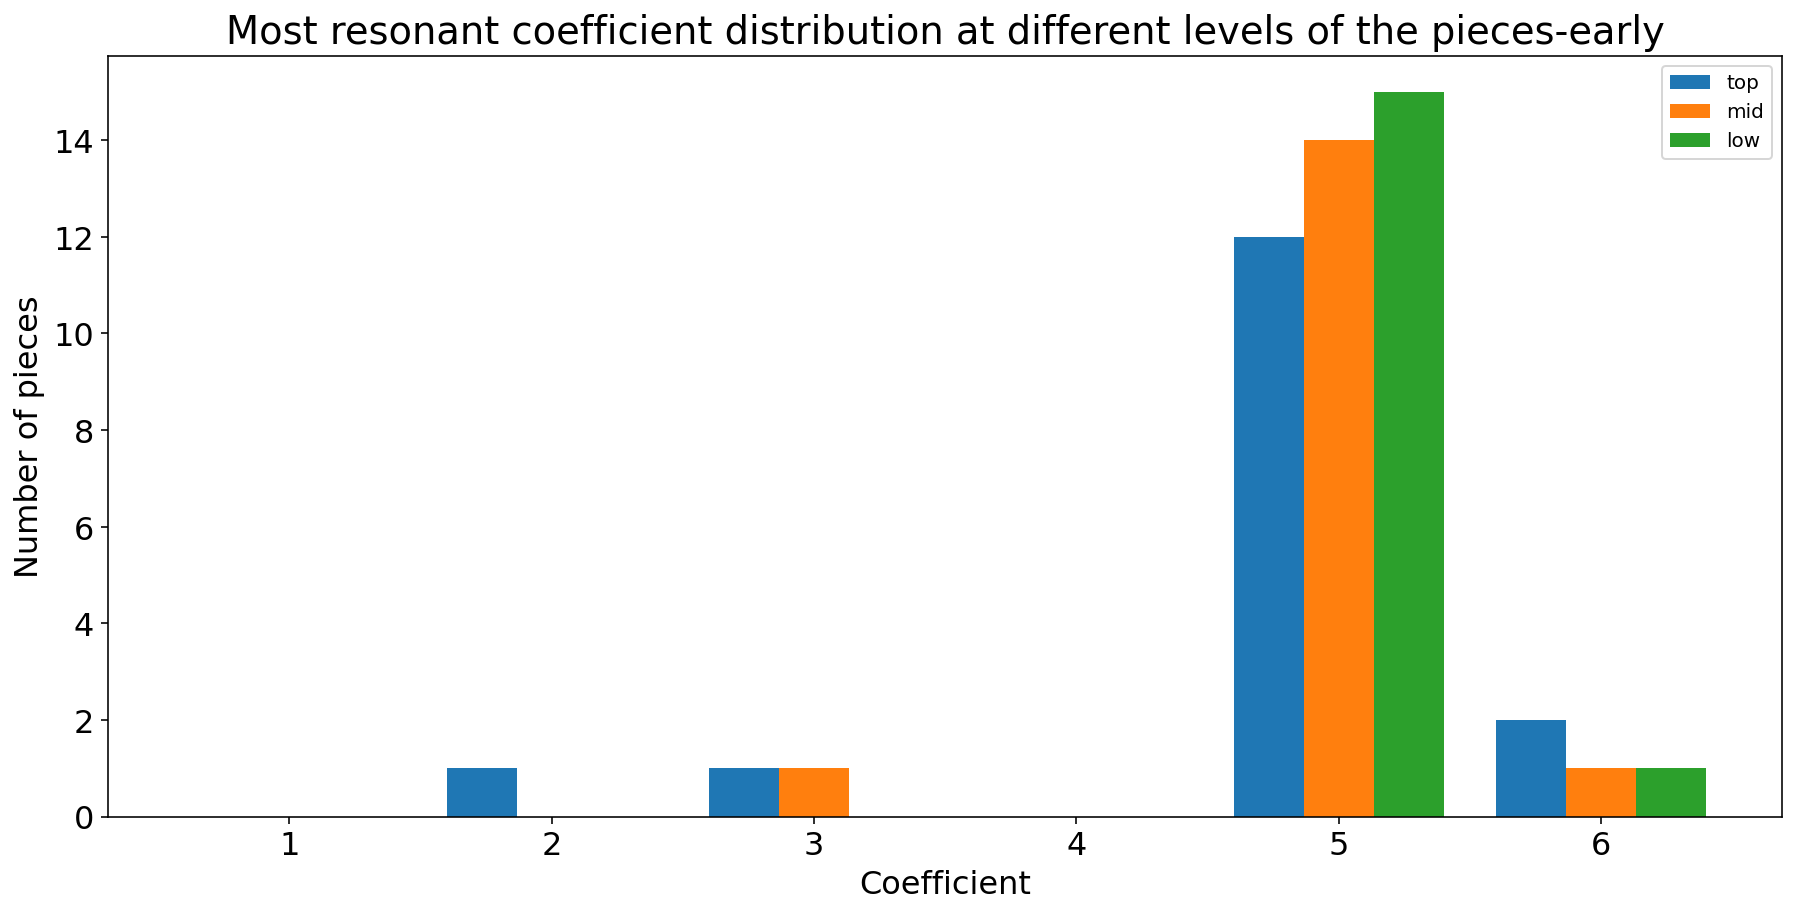

In [8]:
coeffs_el = [d[0] for d in data_el.values()]
coeffs_em = [d[0] for d in data_em.values()]
coeffs_eh = [d[0] for d in data_eh.values()]

fig = plt.figure(figsize=(15, 7))
colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs_eh, coeffs_em, coeffs_el], np.arange(1,8)-0.5, histtype='bar', label=labels)
plt.legend(prop={'size': 10})
plt.xlabel('Coefficient')
plt.ylabel('Number of pieces')
plt.title('Most resonant coefficient distribution at different levels of the pieces-early')



plt.show()

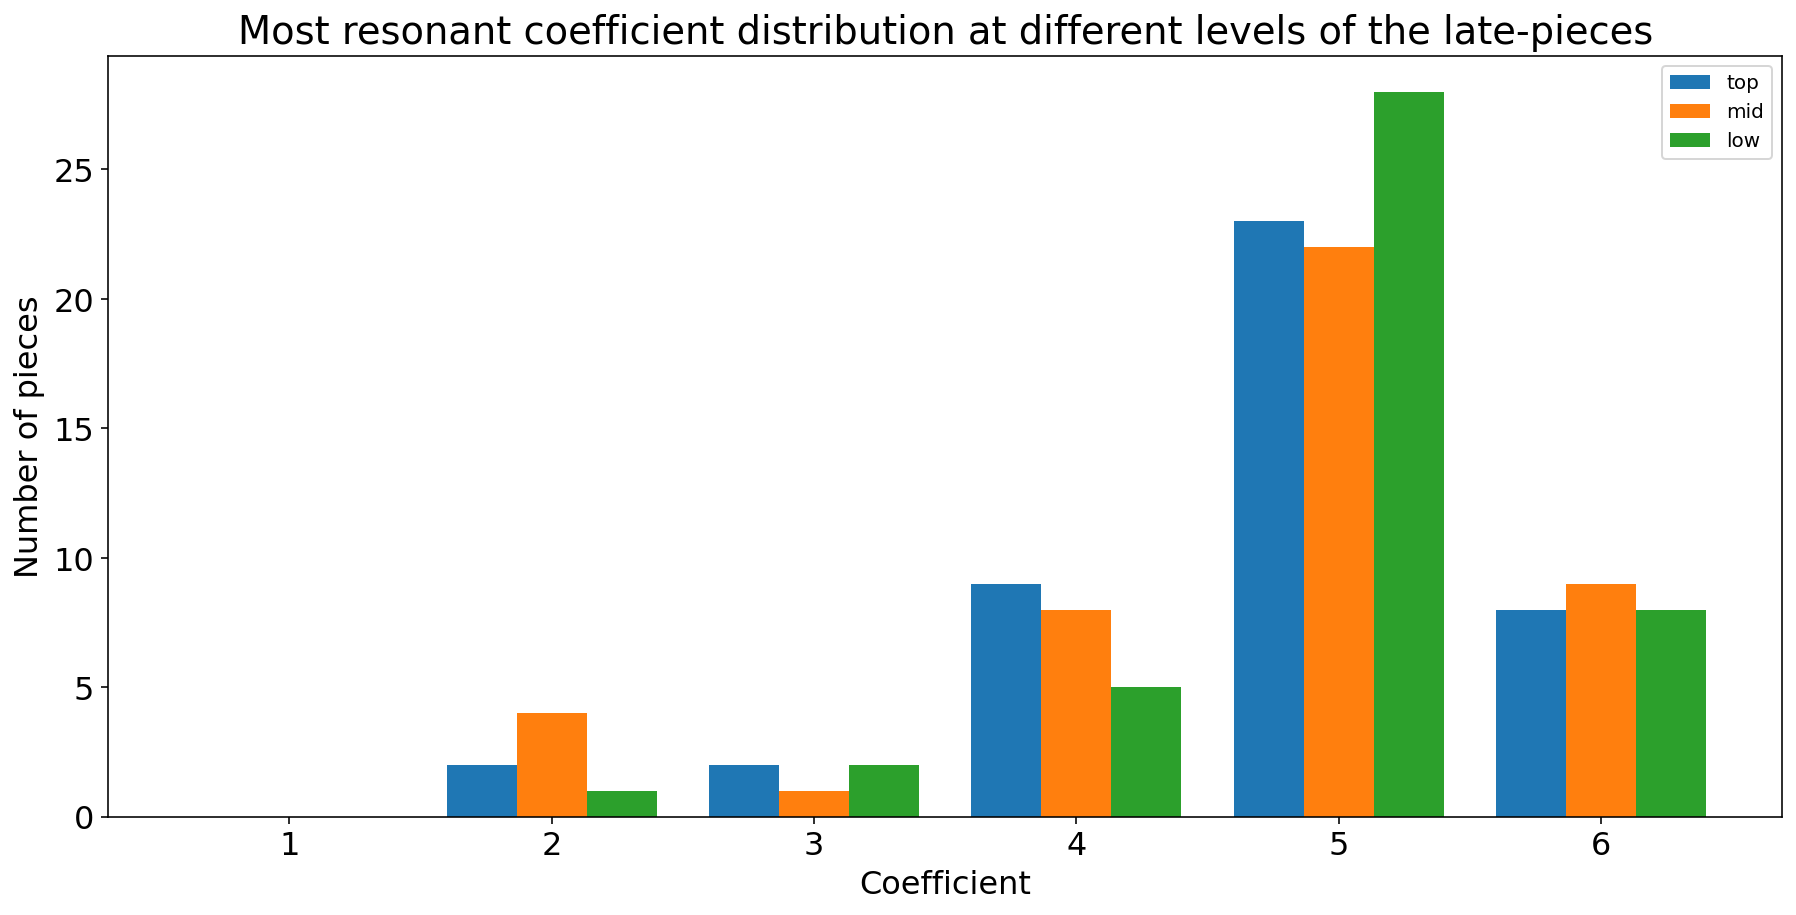

In [29]:
coeffs_ll = [d[0] for d in data_ll.values()]
coeffs_lm = [d[0] for d in data_lm.values()]
coeffs_lh = [d[0] for d in data_lh.values()]

#plt.hist(coeffs_l, bins=6)
#plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')
fig = plt.figure(figsize=(15, 7))
colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs_lh, coeffs_lm, coeffs_ll], np.arange(1,8)-0.5, histtype='bar', label=labels)
plt.legend(prop={'size': 10})
plt.xlabel('Coefficient')
plt.ylabel('Number of pieces')
plt.title('Most resonant coefficient distribution at different levels of the late-pieces')



plt.show()

Splitting the plot in different periods in time, we can observe a huge difference: for the early pieces the 5th coefficient is uniquely found as the most resonant, while in the preludes all the other coefficients (except the 1st) arise significantly. Even if the 5th is still predominant, it is interesting to observe how the 4th and 6th coefficient reaches a similar frequence of appearance at the top-mid levels and the distance between the 5th and the 6th and 4th is less sharp. 


### Distribution of the coefficients across time
In this section we compute and visualize the normalized distribution of all the coefficients across time. Each plot corresponds to 3 different levels in the hierarchy.

In [10]:
for i,score in enumerate(scores):
    print(i ,score.split('\\')[-1])

0 1890Debussy_-_Suite_Bergamasque_-_I._Prelude.mid
1 1890Debussy_-_Suite_Bergamasque_-_II._Menuet.mid
2 1890Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid
3 1890Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid
4 1890Reverie_-_Debussy__as_written.mid
5 1890Valse_romantique_Claude_Debussy.mid
6 1891deuxieme_arabesque.mid
7 1891Mazurka_Claude_Debussy.mid
8 1891premiere_arabesque.mid
9 1892Nocturne_L._82__Claude_Debussy.mid
10 1894images_oubliee_1_(c)lefeldt.mid
11 1894images_oubliee_3_(c)lefeldt.mid
12 1901Ballade_C.Debussy.mid
13 1901Claude_Debussy_Pour_le_Piano_II_Sarabande.mid
14 1901Debussy_-_Danse_Tarantelle_styrienne.mid
15 1901pour_le_piano_1_(c)dery.mid
16 1901pour_le_piano_3_(c)dery.mid
17 1903debussy_estampes_1_(c)galimberti.mid
18 1903estamp2_La soirée_dans_Grenade.mid
19 1903estamp3_Jardins_sous_la_pluie.mid
20 1904lislejoyeuse.MID
21 1905estamp1_Pagodes.mid
22 1905images_1_1_(c)oguri.mid
23 1905images_1_2_(c)oguri.mid
24 1905images_1_3_(c)oguri (1).mid
25 1905pour_le_pia

60


<ipython-input-76-4991368ffa27>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


Text(0.5, 1.0, 'Coefficients across time - top level')

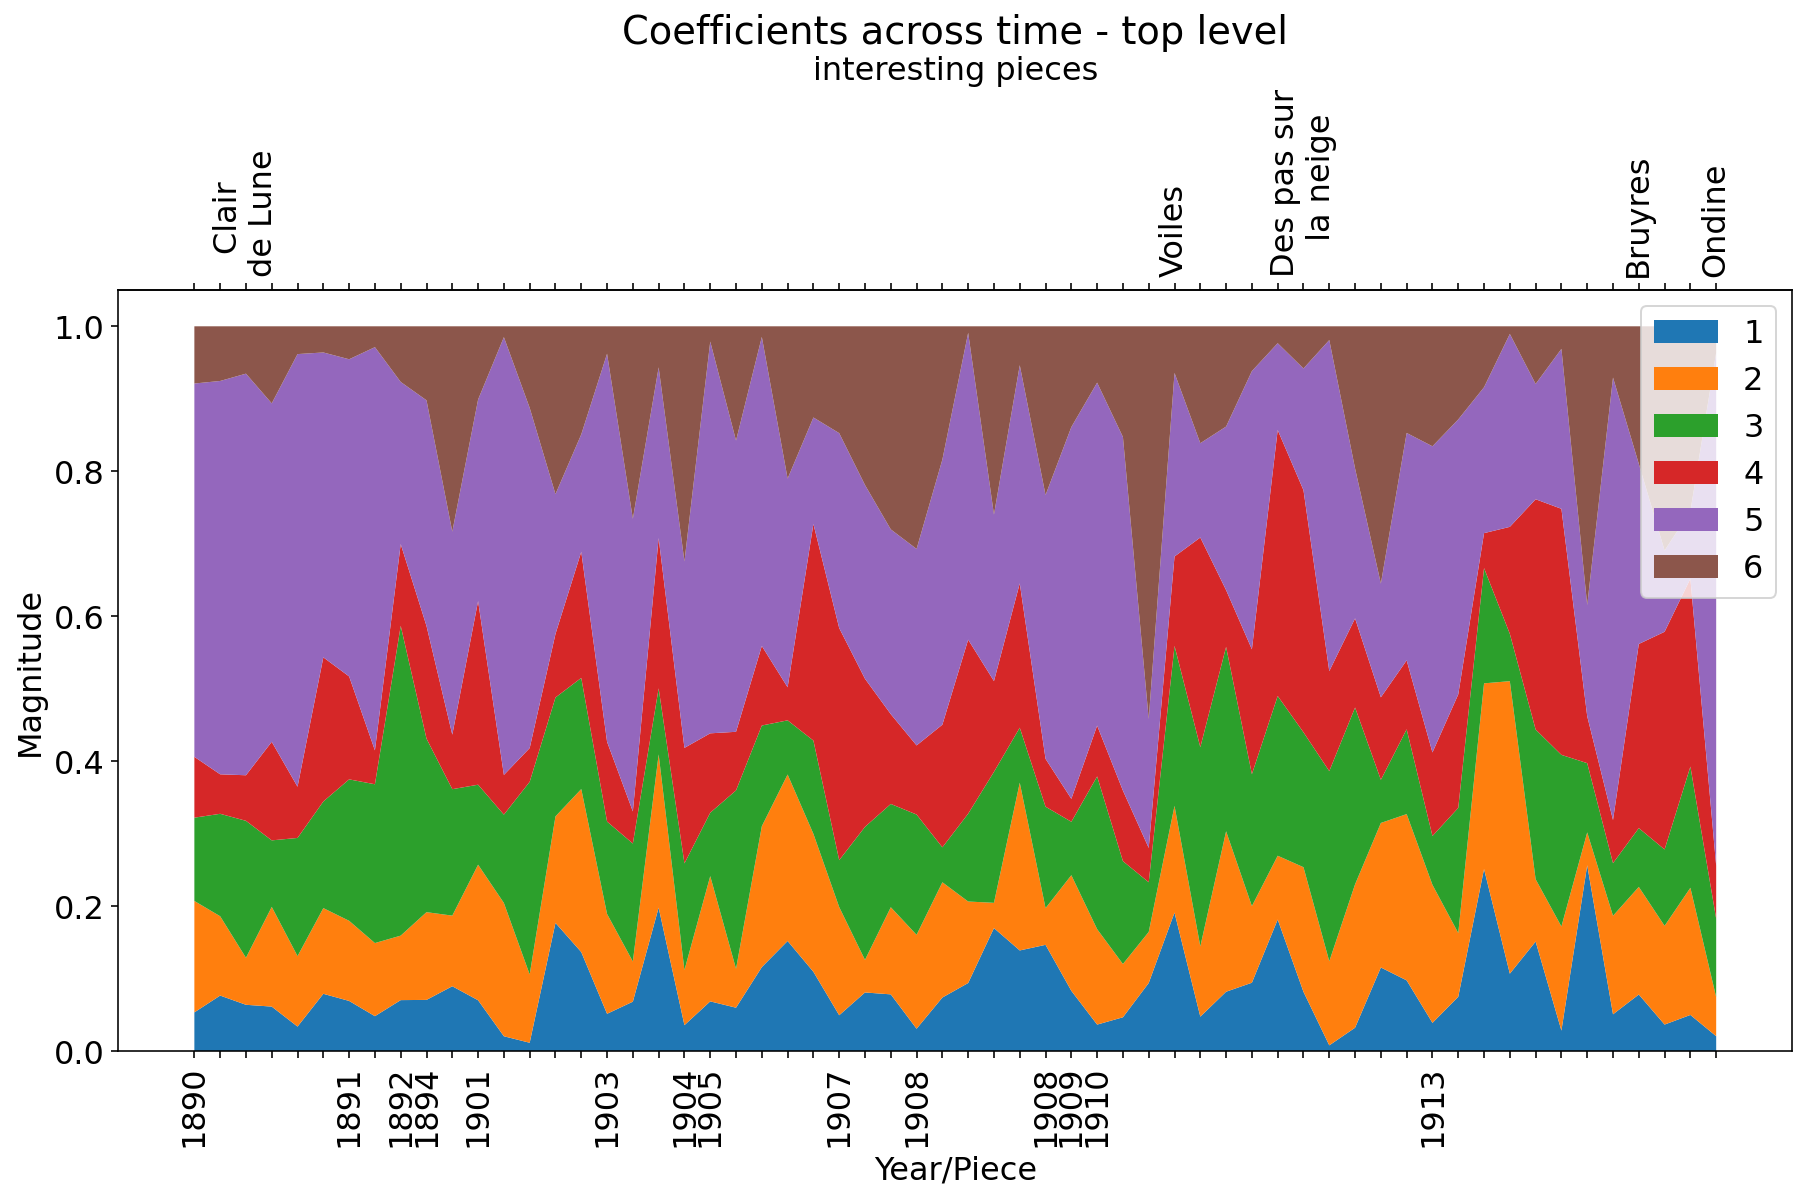

In [76]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5], linewidth=0, labels=['1','2','3','4','5','6'])

labels = [item.get_text() for item in ax.get_xticklabels()]

for lbl in [1, 7, 9, 10, 12, 17, 20, 21, 26, 29, 34, 35, 36, 49]:
    labels[lbl - 1] += scr[lbl - 1].split('\\')[-1][:4]

ax.set_xticklabels(labels, rotation=90)

secax_x = ax.secondary_xaxis('top', xlabel='interesting pieces')

labels_2 = ['' for item in labels]
print(len(labels_2))

labels_2[2] = 'Clair \nde Lune'
labels_2[38] = 'Voiles'
labels_2[43] = 'Des pas sur\n la neige'
#labels_2[45] = 'La fille aux \ncheveux de lin'
labels_2[56] = 'Bruyres'
labels_2[59] = 'Ondine'


secax_x.set_xticks(range(len(labels_2)))
secax_x.set_xticklabels(labels_2, rotation=90)


plt.xlabel('Year/Piece')
plt.ylabel('Magnitude')

plt.legend(loc='upper right')
plt.title('Coefficients across time - top level')



In [49]:
early_5 = y[4][:16]
late_5 = y[4][17:]
print('t-test on 5th coefficient', stats.ttest_ind(early_5,late_5))

early_3 = y[2][:16]
late_3 = y[2][17:]
print('t-test on 3th coefficient', stats.ttest_ind(early_3,late_3))

early_4 = y[3][:16]
late_4 = y[3][17:]
print('t-test on 4th coefficient', stats.ttest_ind(early_4,late_4))

early_6 = y[5][:16]
late_6 = y[5][17:]
print('t-test on 6th coefficient', stats.ttest_ind(early_6,late_6))

t-test on 5th coefficient Ttest_indResult(statistic=2.5711577769608374, pvalue=0.01277034996722358)
t-test on 3th coefficient Ttest_indResult(statistic=1.8155807904093524, pvalue=0.0746960012762797)
t-test on 4th coefficient Ttest_indResult(statistic=-1.8725192074908317, pvalue=0.06626720109723169)
t-test on 6th coefficient Ttest_indResult(statistic=-1.8859422300691704, pvalue=0.06440167651872804)


60


<ipython-input-67-532a48665775>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


Text(0.5, 1.0, 'Coefficients across time - midlevel')

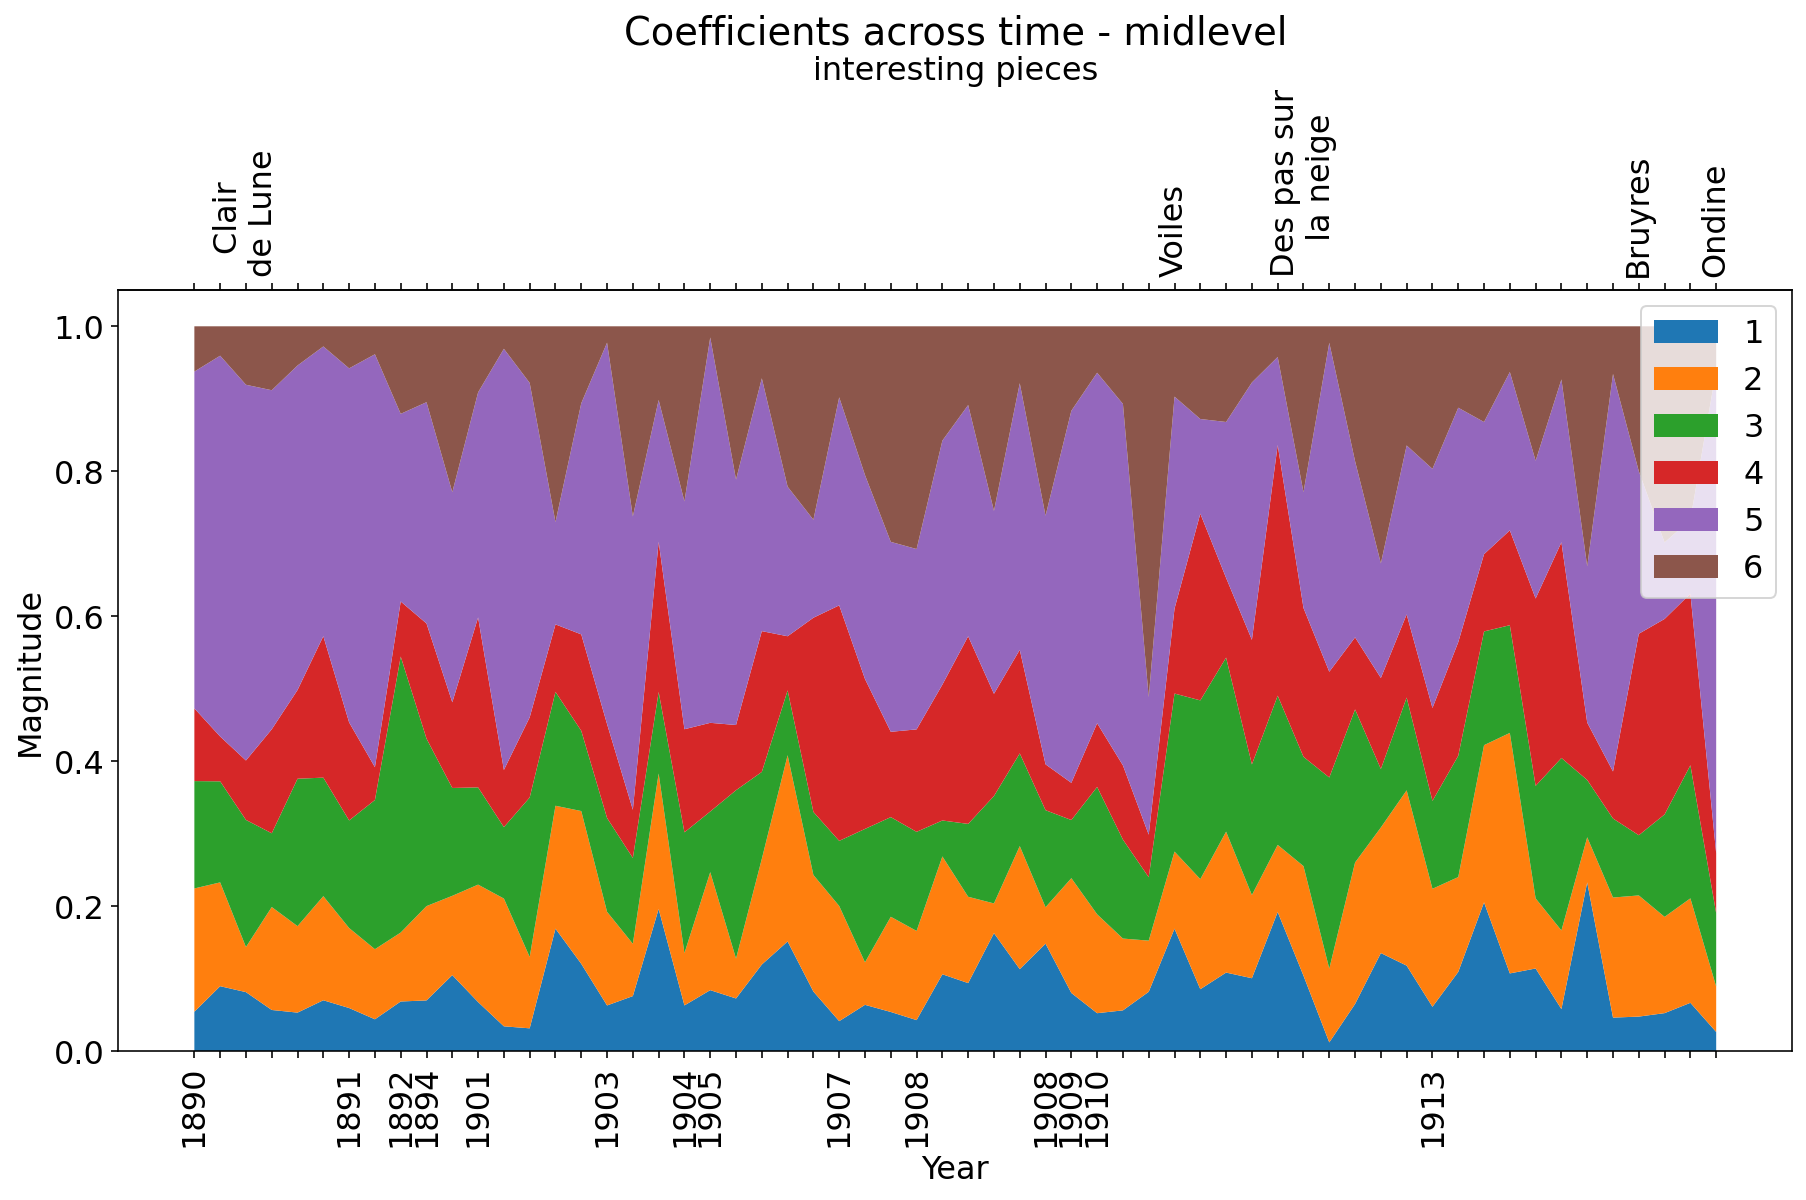

In [67]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data_m.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5],linewidth=0, labels=['1','2','3','4','5','6'])

labels = [item.get_text() for item in ax.get_xticklabels()]


for lbl in [1, 7, 9, 10, 12, 17, 20, 21, 26, 29, 34, 35, 36, 49]:
    labels[lbl - 1] += scr[lbl - 1].split('\\')[-1][:4]

ax.set_xticklabels(labels, rotation=90)

secax_x = ax.secondary_xaxis('top', xlabel='interesting pieces')

labels_2 = ['' for item in labels]
print(len(labels_2))

labels_2[2] = 'Clair \nde Lune'
labels_2[38] = 'Voiles'
labels_2[43] = 'Des pas sur\n la neige'
#labels_2[45] = 'La fille aux \ncheveux de lin'
labels_2[56] = 'Bruyres'
labels_2[59] = 'Ondine'


secax_x.set_xticks(range(len(labels_2)))
secax_x.set_xticklabels(labels_2, rotation=90)


plt.xlabel('Year')
plt.ylabel('Magnitude')

plt.legend(loc='upper right')
plt.title('Coefficients across time - midlevel')


In [68]:
early_5 = y[4][:16]
late_5 = y[4][17:]
print('t-test on 5th coefficient', stats.ttest_ind(early_5,late_5))

early_3 = y[2][:16]
late_3 = y[2][17:]
print('t-test on 3th coefficient', stats.ttest_ind(early_3,late_3))

early_4 = y[3][:16]
late_4 = y[3][17:]
print('t-test on 4th coefficient', stats.ttest_ind(early_4,late_4))

early_6 = y[5][:16]
late_6 = y[5][17:]
print('t-test on 6th coefficient', stats.ttest_ind(early_6,late_6))

t-test on 5th coefficient Ttest_indResult(statistic=3.085917795992596, pvalue=0.0031296627180926735)
t-test on 3th coefficient Ttest_indResult(statistic=1.6858652447379554, pvalue=0.09728901241127268)
t-test on 4th coefficient Ttest_indResult(statistic=-1.9192437365770127, pvalue=0.05996470452669646)
t-test on 6th coefficient Ttest_indResult(statistic=-2.791820182973184, pvalue=0.007120441669053372)


60


<ipython-input-113-6f68ddf79743>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


Text(0.5, 1.0, 'Coefficients across time- lowlevel')

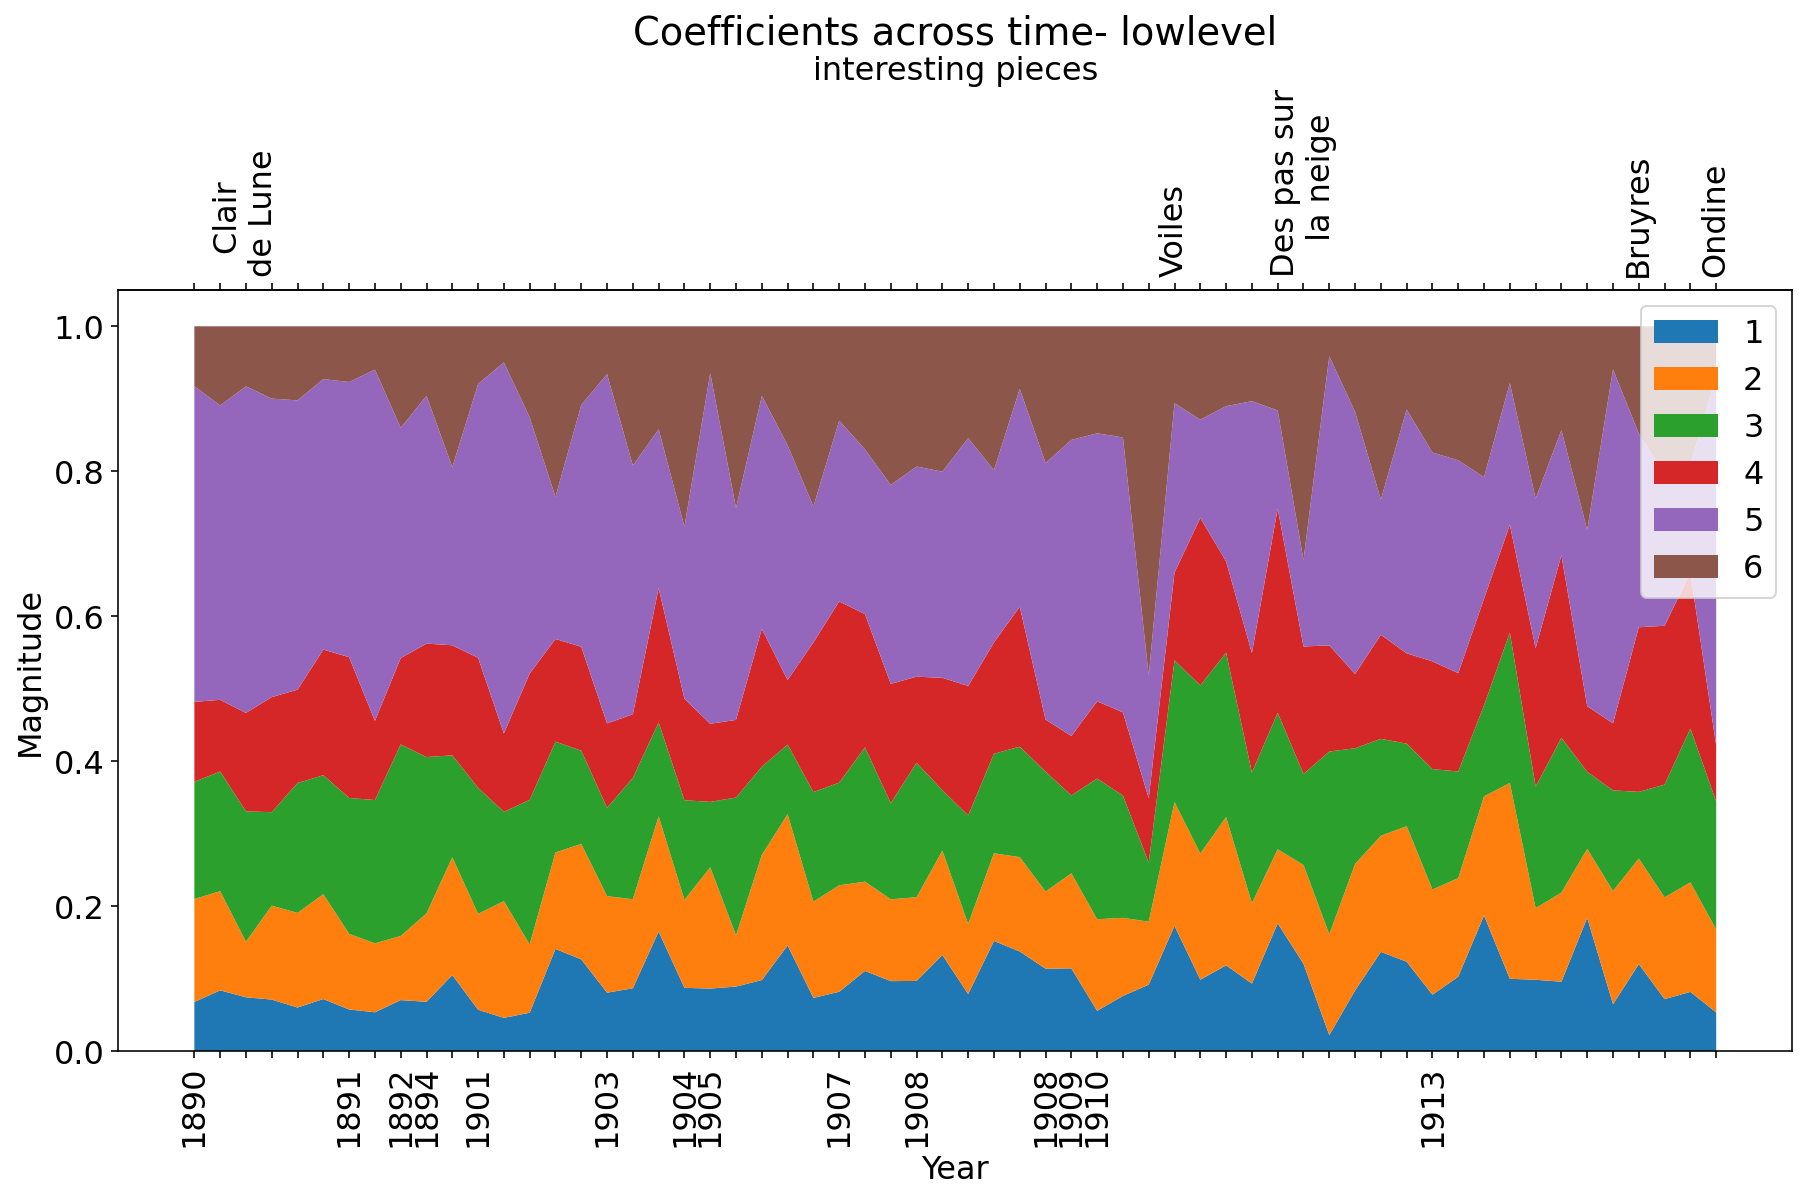

In [113]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data_l.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5],linewidth=0, labels=['1','2','3','4','5','6'])


labels = [item.get_text() for item in ax.get_xticklabels()]

for lbl in [1, 7, 9, 10, 12, 17, 20, 21, 26, 29, 34, 35, 36, 49]:
    labels[lbl - 1] += scr[lbl - 1].split('\\')[-1][:4]


ax.set_xticklabels(labels, rotation=90)

secax_x = ax.secondary_xaxis('top', xlabel='interesting pieces')

labels_2 = ['' for item in labels]
print(len(labels_2))

labels_2[2] = 'Clair \nde Lune'
labels_2[38] = 'Voiles'
labels_2[43] = 'Des pas sur\n la neige'
#labels_2[45] = 'La fille aux \ncheveux de lin'
labels_2[56] = 'Bruyres'
labels_2[59] = 'Ondine'


secax_x.set_xticks(range(len(labels_2)))
secax_x.set_xticklabels(labels_2, rotation=90)


plt.xlabel('Year')
plt.ylabel('Magnitude')

plt.legend(loc='upper right')
plt.title('Coefficients across time- lowlevel')


In [115]:
early_5 = y[4][:16]
late_5 = y[4][17:]
print('t-test on 5th coefficient', stats.ttest_ind(early_5,late_5))

early_3 = y[2][:16]
late_3 = y[2][17:]
print('t-test on 3th coefficient', stats.ttest_ind(early_3,late_3))

early_4 = y[3][:16]
late_4 = y[3][17:]
print('t-test on 4th coefficient', stats.ttest_ind(early_4,late_4))

early_6 = y[5][:16]
late_6 = y[5][17:]
print('t-test on 6th coefficient', stats.ttest_ind(early_6,late_6))

t-test on 5th coefficient Ttest_indResult(statistic=3.607753286049, pvalue=0.0006515456496708112)
t-test on 3th coefficient Ttest_indResult(statistic=1.4538257418845322, pvalue=0.1514788204153765)
t-test on 4th coefficient Ttest_indResult(statistic=-0.6641018851759853, pvalue=0.5093026597290761)
t-test on 6th coefficient Ttest_indResult(statistic=-2.894894588076167, pvalue=0.005367461983013748)


We can clearly observe how from the first horizontal half of the plots(early pieces) to the second one(later pieces) there is a gradual decrease in the contribution of the 5th coefficient. The 1st coefficient does not seem to change particularly.
In the second horizontal half, we can also observe how all the other coefficients(4th and 6th in particular) occupy wider sections in the plot. 

### Testing

#### Test 1: 5th coefficient is higher in early works

At all cardinalities, the 5th coefficient changes significantly 

#### Test 2: other coefficients (i.e. 3,4,6 are higher in later works)

The 3rd coefficient never changes significantly, the 4th coefficient changes at the top and middle level and the 6th at the middle and bottom.

### Center of mass of the pieces
In this section, we compute the vertical center of mass (VCoM) of the earlier and later pieces for all six coefficients. A higher level of VCoM indicates the piece represents the corresponding musical feature as a whole, which means the piece is more coherent in terms of that structure.

In [11]:
from wavescapes import *
from glob import glob
import numpy as np
from center_of_mass_v import *
import matplotlib.pyplot as plt
import seaborn as sns

1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= -0.0005128529836846398
1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= -0.00012980226688848564
1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= -0.0005410350220118395
1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= 0.0013951257847123063
1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= -0.0007521638648598
1891deuxieme_arabesque.mid


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


slope= 0.0016229895521007436


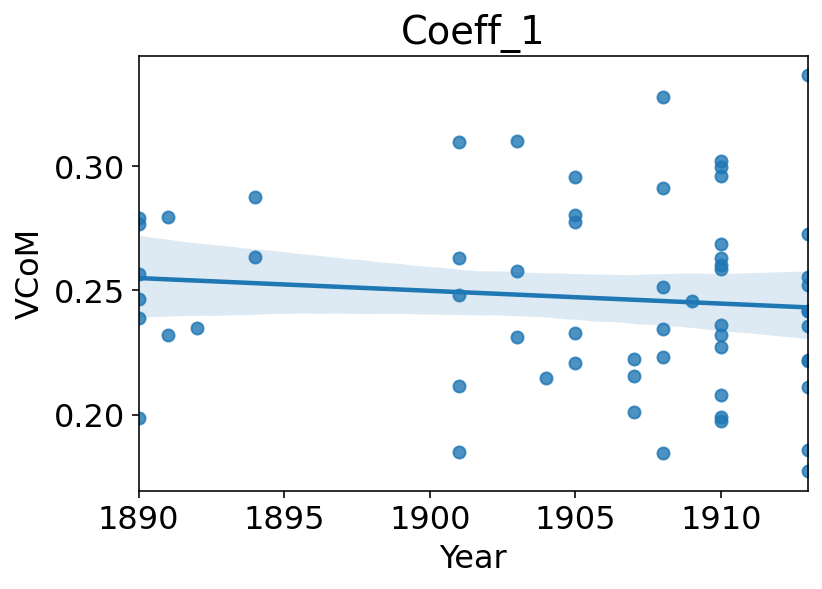

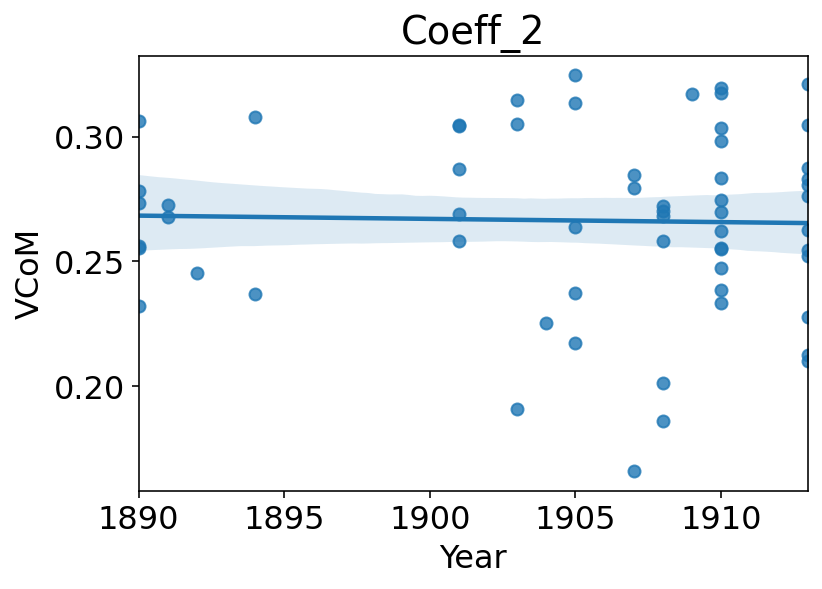

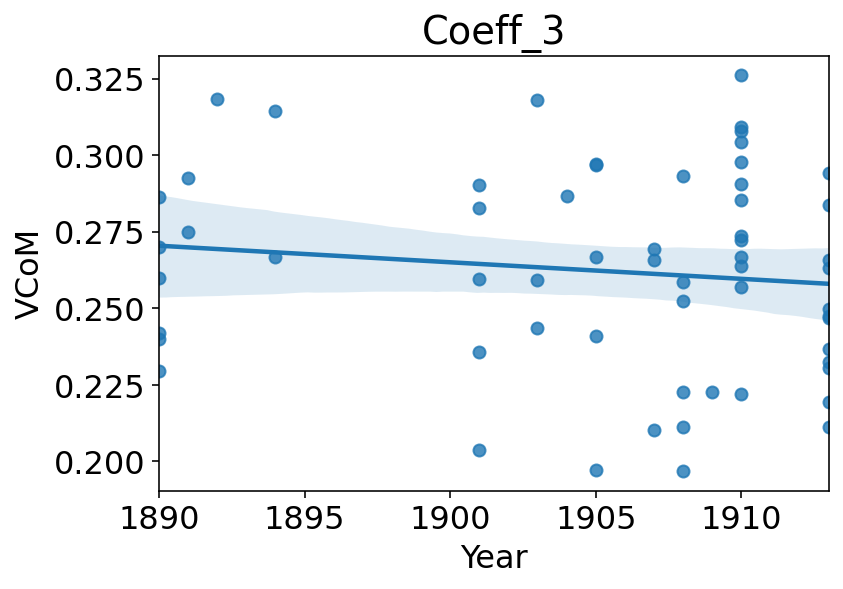

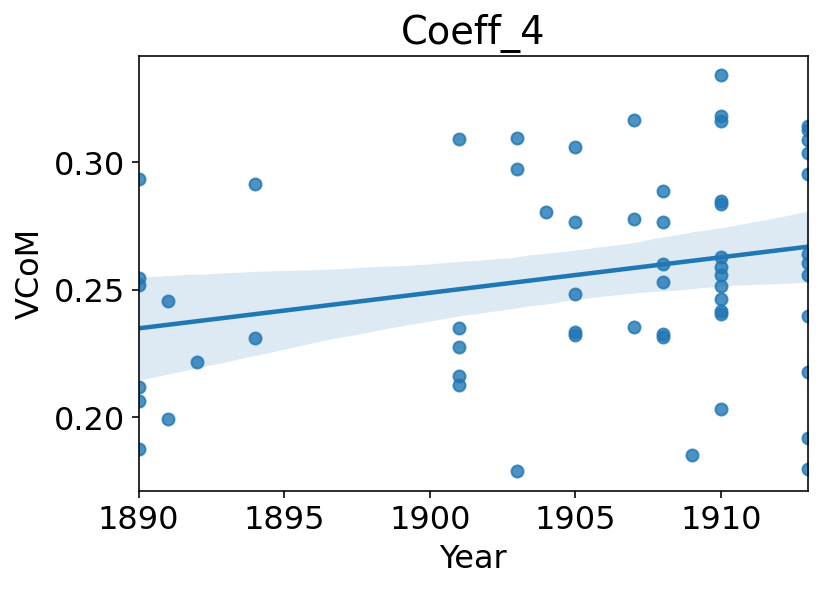

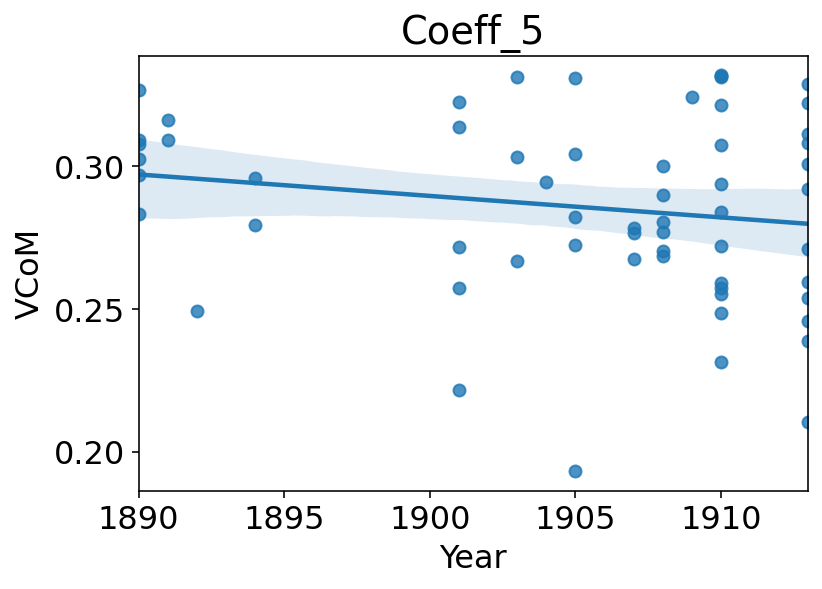

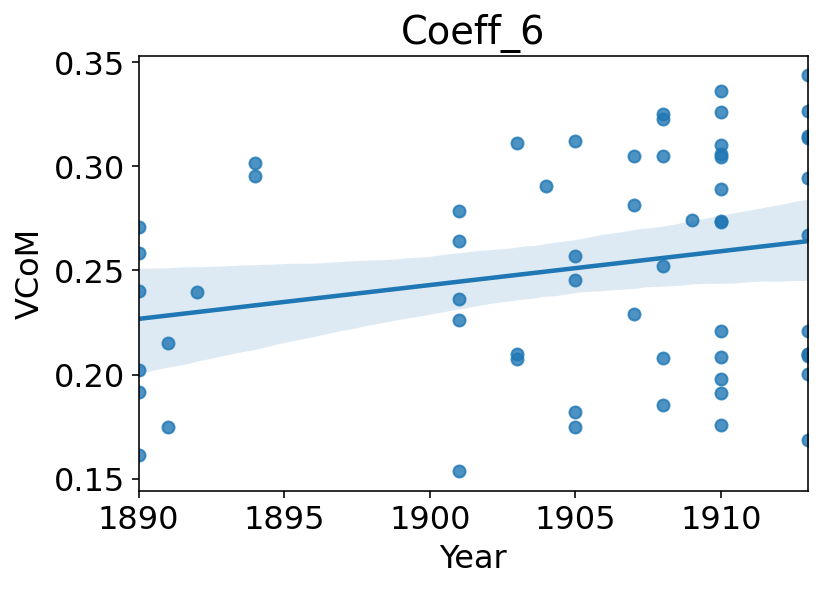

In [116]:
# plot center of mass for all scores
scores = glob('./scores/*.mid')
centers_v = {}
for coeff in range(1,7):
    centers_v[coeff] = [] #(year, VCoM)
    for score in scores:
        score_name = str(score.split('\\')[-1])
        year = int(score_name[0:4])        
        try:
            vcom = center_of_mass_v(score,8.0,coeff)
            centers_v[coeff].append((year, vcom))
        except:
            print(score_name)
            
    x = [int(v[0]) for v in centers_v[coeff]]
    y = [v[1] for v in centers_v[coeff]]
    plt.figure()
    sns.regplot(x,y, ci=95)
    m, b = np.polyfit(x, y, 1)
    print('slope=',m)
    plt.title('Coeff_'+str(coeff))
    plt.xlabel('Year')
    plt.ylabel('VCoM')
    plt.savefig('./figures/VCoM_coeff'+str(coeff)+'.png')

In [118]:
early_5 = [c[1] for c in centers_v[4]][:16]
late_5 = [c[1] for c in centers_v[4]][17:]
print('t-test on 5th coefficient', stats.ttest_ind(early_5,late_5))

early_3 = [c[1] for c in centers_v[2]][:16]
late_3 = [c[1] for c in centers_v[2]][17:]
print('t-test on 3th coefficient', stats.ttest_ind(late_3,early_3))

early_4 = [c[1] for c in centers_v[3]][:16]
late_4 = [c[1] for c in centers_v[3]][17:]
print('t-test on 4th coefficient', stats.ttest_ind(late_4,early_4))

early_6 = [c[1] for c in centers_v[5]][:16]
late_6 = [c[1] for c in centers_v[5]][17:]
print('t-test on 6th coefficient', stats.ttest_ind(late_6,early_6))

t-test on 5th coefficient Ttest_indResult(statistic=-2.1546897872975657, pvalue=0.035425080672195415)
t-test on 3th coefficient Ttest_indResult(statistic=-0.8397110787310307, pvalue=0.40457868734084834)
t-test on 4th coefficient Ttest_indResult(statistic=-0.776550579778532, pvalue=0.44063460571920887)
t-test on 6th coefficient Ttest_indResult(statistic=-0.9557310065975567, pvalue=0.34324413184832736)


Although we don't have the same amount of the earlier pieces as the later ones, we can still observe some differences in distribution of VCoMs. For example, for the 2nd and 5th coefficient, later pieces show more VCoMs in the lower level. While for the 4th and 6th coefficient, later pieces show more VCoMs in the higher level.

Considering the regression line, only the 5th decreases significantly while the 4th and 6th increase.

### Entropy and number of peaks of the pieces

In this section, we compute the entropy values over time based on the magnitude and the phase values, followed by an analysis of the number of peaks in the magnitude signal and a plot of the signal of the magnitude of the 5th coefficient given an early and a late work. 

In [13]:
from wavescapes import *
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# our files
from predict_penta_dia import *
from entropy_substructures import *

scores = glob('./scores/*.mid')
length_score = {}
for score in scores:
    try:
        length_score[score] = get_length_score(score)
    except:
        print('could not load file')
        
        
min_length = min(list(length_score.values()))
min_length

could not load file


24

In [14]:
entropies_05 = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        entropies_05[score] = compute_magnitude_entropy(score, ver_ratio=0.05, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished magnitude entropies')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


could not load file
finished magnitude entropies


In [15]:
entropies_05 = {}
for score in scores:
    try:
        entropies_05[score] = compute_magnitude_entropy(score, ver_ratio=0.05)
    except:
        print('could not load file')
        
print('finished magnitude entropies')

could not load file


C:\Users\ludov\OneDrive\Desktop\Digital Musicology\Group-5-Debussy-Pitch-Scapes\entropy_substructures.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sel = np.array([ve[int(utm.shape[1] * hor_ratio[0]):int(utm.shape[1] * hor_ratio[1])] for ve in vec])


could not load file
could not load file
could not load file
could not load file
could not load file
finished magnitude entropies


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Spectral Entropy')

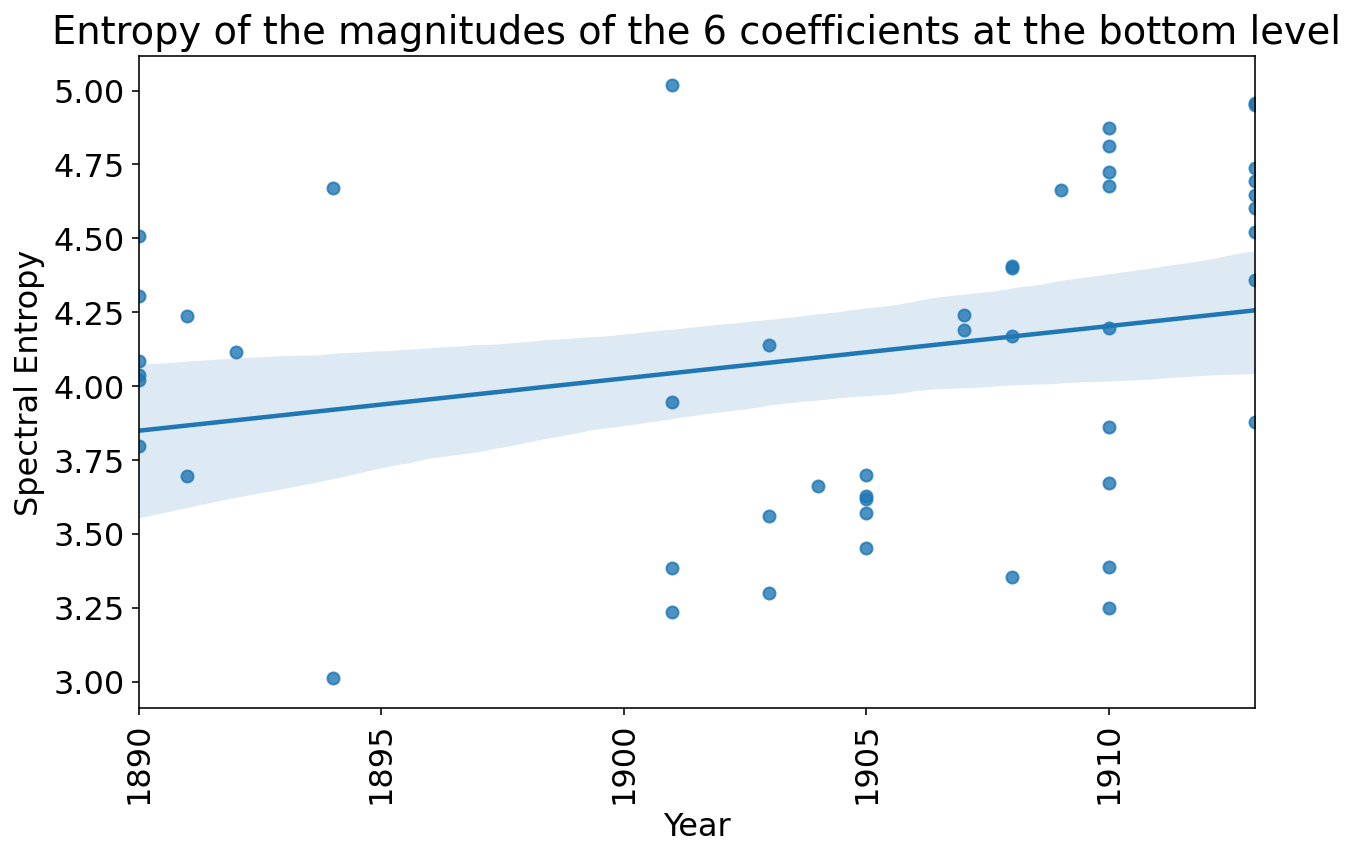

In [119]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
x = [int(name.split('\\')[-1][:4]) for name in entropies_05.keys()]
y = [np.array(val).sum() for val in entropies_05.values()]

sns.regplot(x,y, ci=95, ax=ax)


plt.xticks(rotation=90)
plt.title('Entropy of the magnitudes of the 6 coefficients at the bottom level')
plt.xlabel('Year')
plt.ylabel('Spectral Entropy')

In [120]:
early = y[:16]
late = [y_ for y_ in y if y_==y_][17:]

print('t-test on entropy for magnitude', stats.ttest_ind(late,early))

[4.303824404470406, 4.509609678900933, 4.038153025592019, 3.79616772033326, 4.021414158979709, 4.084561377348273, 3.6942826888784257, 4.237663489866225, 4.113839105871102, 4.6708469843263405, 3.010341293330192, 3.9465213595773543, 5.017619337446102, 3.234584338968197, 3.3841047536289466, 4.138990521134683] [3.559928294759533, 3.663433468586879, 3.452959068737986, 3.627814956951572, 3.700289197341241, 3.5693912436197133, 3.616783588440483, 4.2399915010589595, 4.1886581549293425, 4.1680655621778255, 3.355194227959303, 4.4066106145107655, 4.400387718021838, 4.663730560562564, 3.8612561968594914, 4.675787912302596, 4.726209608488812, 4.195934939257244, 3.671489840339061, 4.874391093230923, 3.388688859410246, 3.2498439457804364, 4.8132576932310815, 4.952200966493846, 4.647467454068043, 4.738378904764974, 4.604421853329858, 3.878759334795298, 4.520913241215265, 4.959325201273049, 4.358044631663483, 4.692576517957335]
t-test on entropy for magnitude Ttest_indResult(statistic=0.958464433114564

In [17]:
entropies_phase = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        entropies_phase[score] = compute_entropy_phase(score, ver_ratio=0.1, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished phase entropies')

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:248: RuntimeWarning: invalid value encountered in true_divide
  psd_norm = psd / psd.sum(axis=axis, keepdims=True)


could not load file


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: divide by zero encountered in log2
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)
C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\antropy\entropy.py:249: RuntimeWarning: invalid value encountered in multiply
  se = -(psd_norm * np.log2(psd_norm)).sum(axis=axis)


finished phase entropies


In [18]:
entropies_phase = {}
for score in scores:
    try:
        entropies_phase[score] = compute_entropy_phase(score, ver_ratio=0.1)
    except:
        print('could not load file')
        
print('finished phase entropies')

could not load file
finished phase entropies


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Normalized Spectral Entropy')

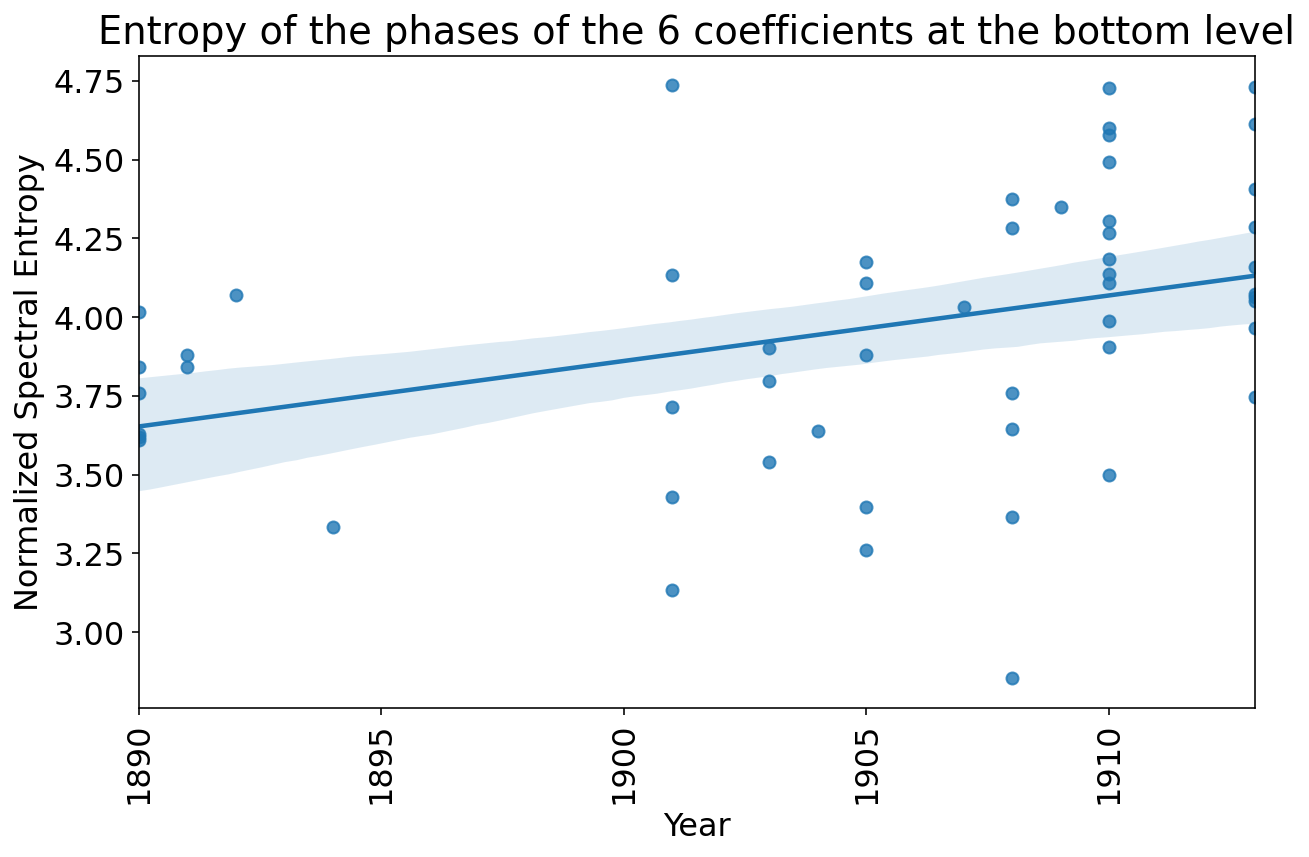

In [121]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
x = [int(name.split('\\')[-1][:4]) for name in entropies_phase.keys()]
y = [np.array(val).sum() for val in entropies_phase.values()]

sns.regplot(x,y, ci=95, ax=ax)


plt.xticks(rotation=90)
plt.title('Entropy of the phases of the 6 coefficients at the bottom level')
plt.xlabel('Year')
plt.ylabel('Normalized Spectral Entropy')

In [109]:
early = [y_ for y_ in y if y_==y_][:16]
late = [y_ for y_ in y if y_==y_][17:]
print('t-test on entropy for phase', stats.ttest_ind(early,late))

t-test on entropy for phase Ttest_indResult(statistic=-2.1921121234307144, pvalue=0.032961203497122296)


In [28]:
sns.regplot(x,y, ci=95, ax=ax)

C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Entropy of the phases of the 6 coefficients at the bottom level'}, xlabel='Year', ylabel='Normalized Spectral Entropy'>

After normalization, the spectral entropies of the pieces seem to be slightly increasing in time as we expected both in magnitude and phase. This, we believe, indicates that the pieces contain more substructures, transitioning from a scale to another and from a pitch field to another 

In [20]:
magnitudes = {}
for score in scores:
    try:
        magnitudes[score] = compute_magnitude_5(score, ver_ratio=0.05)
    except:
        print('could not load file')
                    
print('finished magnitude of 5th coeffient')

could not load file
finished magnitude of 5th coeffient


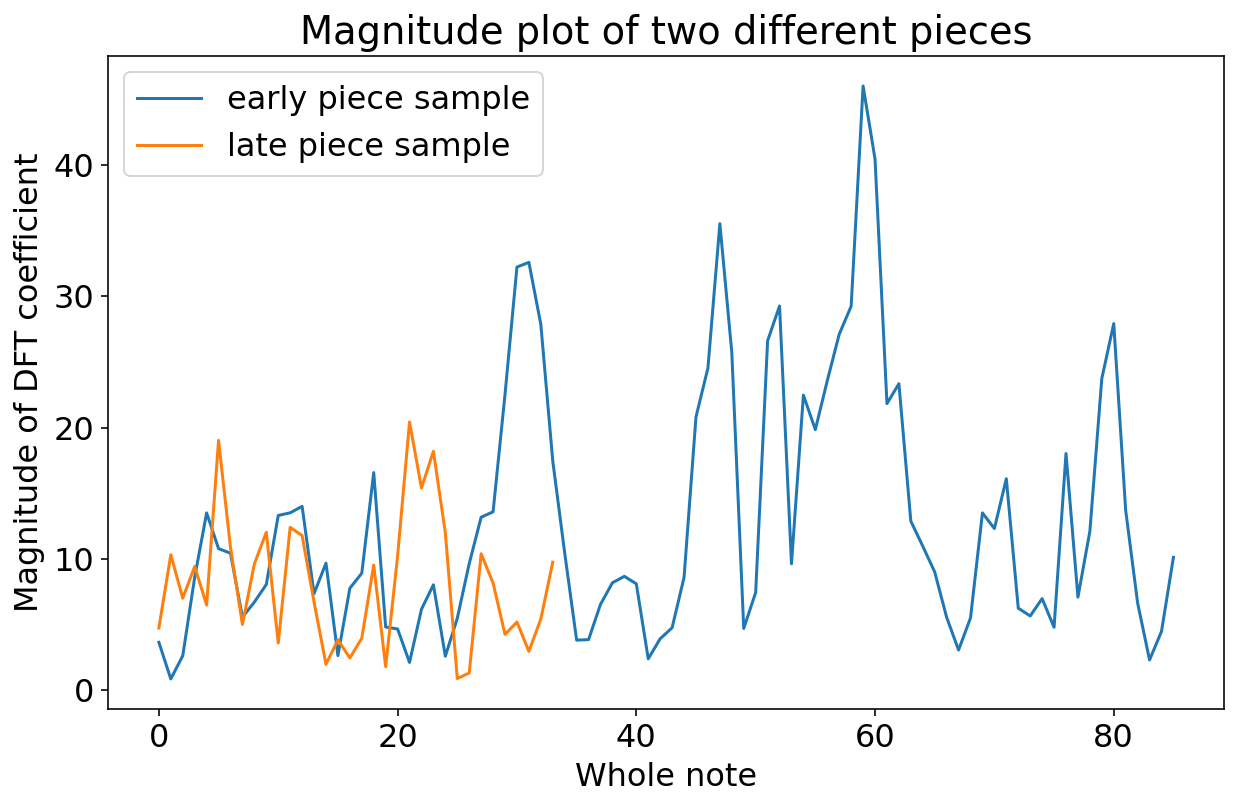

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot() 
ax.plot(list(magnitudes.values())[0], label='early piece sample')
ax.plot(list(magnitudes.values())[-3], label='late piece sample')
plt.title('Magnitude plot of two different pieces')
plt.xlabel('Whole note')
plt.ylabel('Magnitude of DFT coefficient')
plt.legend()

In [22]:
peaks = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        peaks[score] = compute_peaks(score, ver_ratio=0.05, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished peaks computation')

could not load file
finished peaks computation


In [24]:
peaks = {}
for score in scores:
    try:
        peaks[score] = compute_peaks(score, ver_ratio=0.05)
    except:
        print('could not load file')
        
print('finished peaks computation')

could not load file
finished peaks computation


C:\Users\ludov\anaconda3\envs\ada\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Normalized number of peaks')

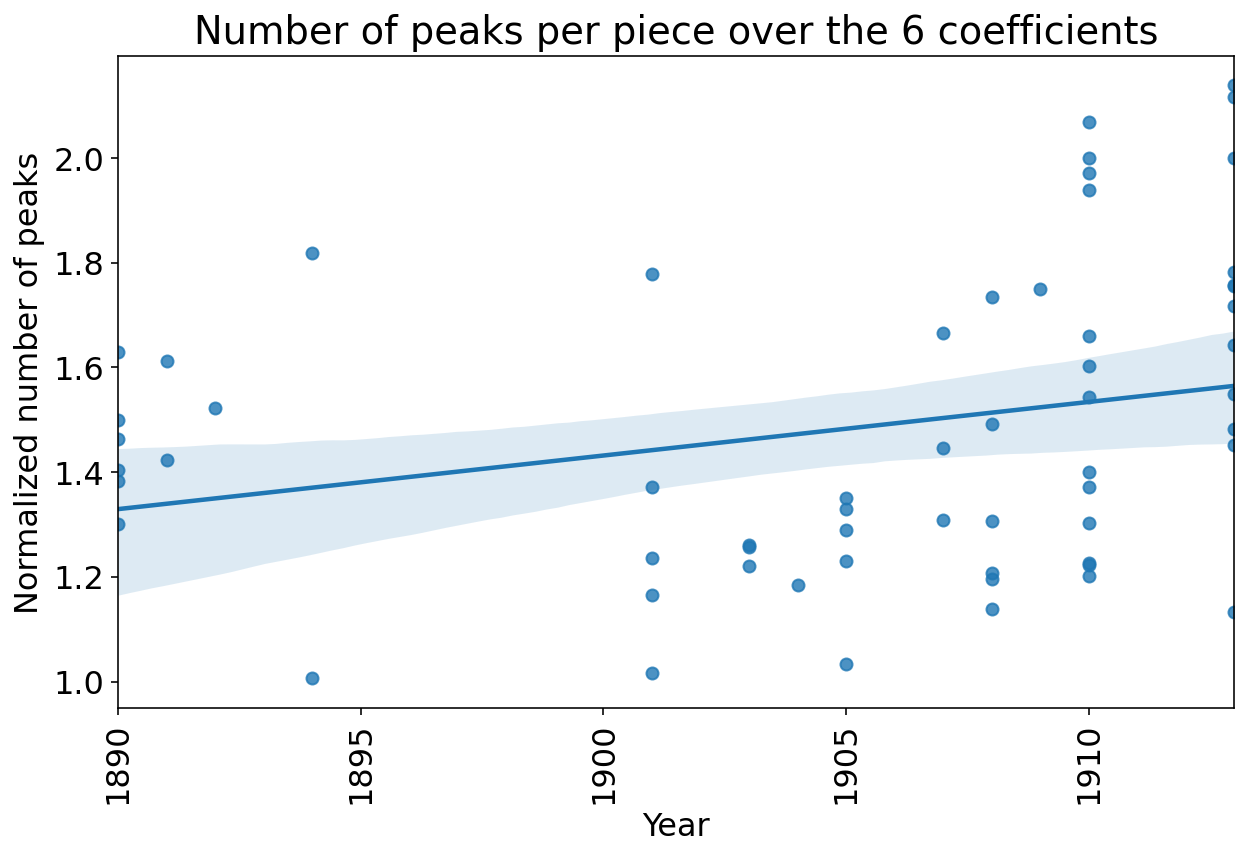

In [122]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot() 
x = [int(name.split('\\')[-1][:4]) for name in peaks.keys()]
y = [np.array(val).sum() for val in peaks.values()]
sns.regplot(x,y, ci=95, ax=ax)

plt.xticks(rotation=90)
plt.title('Number of peaks per piece over the 6 coefficients')
plt.xlabel('Year')
plt.ylabel('Normalized number of peaks')

In [123]:
early = y[:16]
late = y[17:]
print('t-test on number of peaks', stats.ttest_ind(late,early))

t-test on number of peaks Ttest_indResult(statistic=1.1997233434958545, pvalue=0.2352098873197796)


To provide more evidence of this increase in the use of substructures, we plotted the behaviour of the DFT magnitude coefficients at the bottom level for both an early and a late piece. From the plot, the late piece is clearly has clearly a higher number of peaks, which seem to indicate higher variability in the signal. For this reason we plotted also the total number of peaks per piece in time. As expected, the number seems to increase, matching our hypothesis.

From the regression line with confidence intervals, only the entropy of the phase is significantly increasing.

### Pentatonic vs Diatonic Dispute

In this section, we will present the results of the 2 proposed algorithms to distinguish a pentatonic from a diatonic scale based on diffirent similarity measures. 

In the first two cells, the accuracy of Method 1 (the magnitude based method) and Method 2 (the phase based method) are presented. These are computed on the ground truth scales we extracted from Debussy's works, as mentioned above. As one can see, the two are largely comparable and good (but not great) in terms of accuracy. 

In [25]:
# Pentatonic vs Diatonic prediction

# method 1
from predict_penta_dia import *

from wavescapes import *
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

penta_reductions = glob('./reductions/penta/*.mid')
dia_reductions = glob('./reductions/diatonic/*.mid')

tot = 0
correct = 0
for penta in penta_reductions:
    _,pred,_ = predict_penta_dia(penta, aw_size=1)
    tot += 1
    if pred == 'pentatonic scale':
        correct += 1

print('Method 1 score for pentatonic recognition', correct/tot)

tot = 0
correct = 0
for dia in dia_reductions:
    _,pred,_ = predict_penta_dia(dia,aw_size=1)
    tot += 1
    if pred == 'diatonic scale':
        correct += 1

print('Method 1 score for diatonic recognition', correct/tot)

Method 1 score for pentatonic recognition 0.7647058823529411
Method 1 score for diatonic recognition 0.631578947368421


In [26]:
# method 2
from predict_penta_dia_2 import *

tot = 0
correct = 0
for penta in penta_reductions:
    pred,_ = predict_penta_dia_2(penta,aw_size=1)
    tot += 1
    if pred == 'Pentatonic':
        correct += 1

print('Method 2 score for pentatonic recognition', correct/tot)

tot = 0
correct = 0
for dia in dia_reductions:
    pred,_ = predict_penta_dia_2(dia,aw_size=1)
    tot += 1
    if pred == 'Diatonic':
        correct += 1

print('Method 2 score for diatonic recognition', correct/tot)

Method 2 score for pentatonic recognition 0.7647058823529411
Method 2 score for diatonic recognition 0.5789473684210527


Based on the results above, we predict a scale Pentatonic if both algorithms identify it as Pentatonic and mixed otherwise. The same goes for Diatonic. In so doing, we distinguish more reliable results from lesser ones and can plot in time the tripartite results.

In [27]:
scores = glob('./scores/*.mid')

dic_scores = {}
for score in scores:
    #print('score:', score.split('\\')[-1])
    try:
        coeff, pred, _ = predict_penta_dia(score, aw_size=10)
        if coeff == 5:
            #print('method 1 prediction', pred)
            pred2,_ = predict_penta_dia_2(score)
            #print('method 2 prediction', pred2)
            if pred == 'diatonic scale' and pred2 == 'Diatonic':
                dic_scores[score] = pred2
            elif pred == 'pentatonic scale' and pred2 == 'Pentatonic':
                dic_scores[score] = pred2
            else:
                dic_scores[score] = 'Mixed'
    except:
        print('could not read score')

could not read score


Text(0.5, 1.0, 'Predicted scale between pentatonic and diatonic in time')

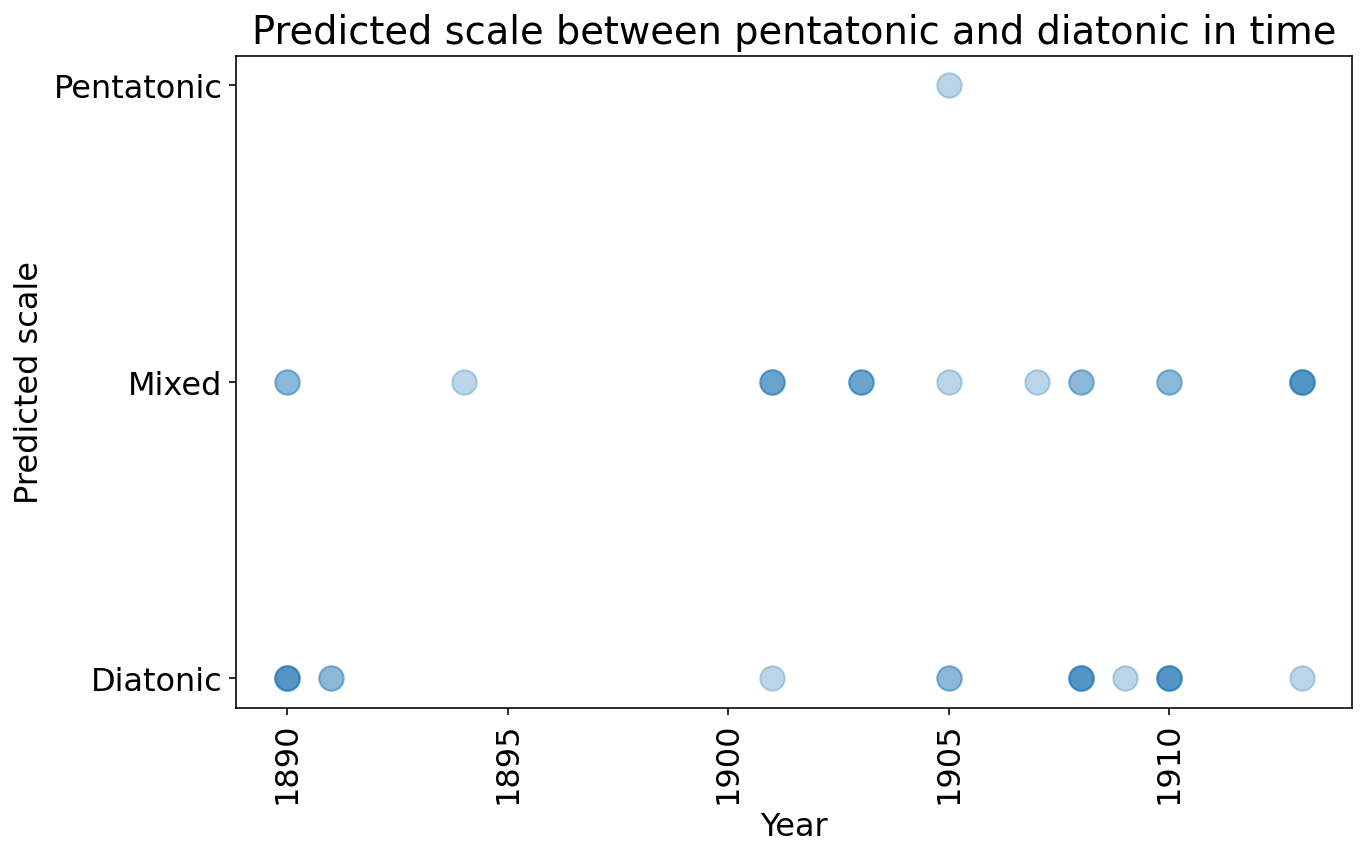

In [28]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
x = [int(name.split('\\')[-1][:4]) for name in dic_scores.keys()]
y = list(dic_scores.values())
ax.scatter(x,y,alpha=.3,s=150)

plt.xlabel('Year')
plt.ylabel('Predicted scale')
plt.xticks(rotation=90)
plt.title('Predicted scale between pentatonic and diatonic in time')

From these results, no clear trend is visible. However, we can see that the models predict mixed with greater frequency for the later pieces. This seems to indicate that the attribution of the scale of each piece becomes more controversial, possibly indicating even a mixture of the two scales inside the piece.

### Manual analysis of «La cathédrale engloutie»

The analysis of «La cathédrale engloutie» provides us with a good example of how Debussy’s Impressionist style, permitting us to observe how the compositional devices exploited by the composer appear in the 6 coefficients. Among the charateritic elements of this piece, we point out: parallel chords, pentatonic and diatonic scales (sometimes overlapping), whole tone harmonies, diminished sounds. It is possible to identify which sections of the plot correspond to the use of a certain structure or pattern(e.g. chord sequences). The phases of the 5th coefficient clearly detect the different diatonic fields. The use of whole tone scales is very recognizable, manifesting itself with a very strong magnitude on the 6th coefficient and with a complementary faded area in the 5th. However, we couldn’t find any clear and visible difference in the 5th coefficient or in any other coefficient that could help us tell apart pentatonic from diatonic scales.
A more detailed covering of the structures examined in the piece can be found [here](analysis/cathedrale/cathédrale_engloutie_analysis.xlsx).

The analysis gave us a better understanding of the features and limitation this model to take in account for the interpretation of our results. In particular, the main problems found are that:
- the PCVs are constructed without any metrical weighting, considering only duration weighting 
- that it is impossible to separate different vertical layers or voices(besides the bass) in a musical sequence.

## Interpretation



From the statistical analysis we obtained important insights on the role of the different structures exploited by Debussy. 
Asymmetrical forms (diatonic and pentatonic scales) still represent an important element in the structure of the pieces, however our results show that in later pieces symmetrical scales, such as whole tone scales or octatonic scales, gradually start to carry out an important function in the construction of the piece. This confirms our hypothesis that we would observe a rise of symmetrical scales in the hierarchical harmonic structure of Debussy’s pieces as we move from his early works to later works. 

Moreover, from our results we can observe a fragmentation in the overall structure of the 5th coefficient, which expresses a more shattered harmonic structure. We find particularly interesting the finding that the 4th coefficient rises in frequency, and therefore so do the use of octatonic scales and diminished chords. Even if this was part of our initial assumptions, from our literature study and from a visual approach to the wavescape plots we didn’t expect it to gain an importance close to the one of the whole-tone scale (6th coefficient). It is indeed more common to find studies connecting Debussy’s piano works to the whole tone scale [5][6]. Finding the whole-tone scale is also easier looking at the plots because of the nature of the 6th coefficient which is binary in phase. 

A corroboration of this result is also observable from the results related to the VCoM: for later pieces the 4th and 6th coefficients move higher in the hierarchy (which was one of our hypotheses), while the 5th coefficient is more frequently found in lower levels. Furthermore, the entropy results are quite interesting with respect to our assumptions, as their growth in time can be interpreted as a greater use of various structures adjacent to each other and thus they could be connected to our hypothesis about the composer’s use of hybrid structures.

We plan to include in our discussion some detailed analysis of examples of relevant musical passages that permit us to describe the role of the 4th and 6th coefficient and to expand our observations around this aspect.



## References

[1] Rochberg, G. (1997). Polarity in music: Symmetry and asymmetry and their consequences. Proceedings of the American Philosophical Society, 141(2), 169-176.

[2] Gonzo, C., Mallard, B., & Renner, D. (2002). Octatonic, chromatic, modal, and symmetrical forms that supplant tonality in five piano preludes by Claude Debussy. A.Tobin, 2005, Octatonic, chromatic, modal, and symmetrical forms that supplant tonality in five piano preludes by Claude Debussy http://hdl.handle.net/2152/11031

[3] Jameson, E. R. (1942). A stylistic analysis of the piano works of Debussy and Ravel (Doctoral dissertation, North Texas State Teachers College).

[4] Feynman, R. P. (1963). The Feynman Lectures on Physics. Reading, Addison-Wesley Pub. Co.

[5] Uchida, R. (1990). Tonal ambiguity in Debussy's piano works (Doctoral dissertation, University of Oregon).

[6] Jameson, E. R. (1942). A stylistic analysis of the piano works of Debussy and Ravel (Doctoral dissertation, North Texas State Teachers College).